## Import the necessary libraries

In [12]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

## Load the dataset using Pandas

In [13]:
dataset = pd.read_csv('E:\Work Space\Ecko data\PCA_practice_dataset.csv')

In [14]:
sc = StandardScaler()

data_set = sc.fit_transform(dataset)

In [15]:
print(data_set.shape)

(8041, 35)


## Find eigen vectors

In [19]:
mean_ = np.mean(data_set,axis=0)
print(mean_.shape)
cov = np.cov(data_set)
print(cov.shape)

eig_val,eig_vec = np.linalg.eig(cov)
#print(eig_vec.shape)

(35,)
(8041, 8041)


## Find the right singular vectors**

In [17]:
eigen_vec_ls = []
#eig1 = train_mat.T@eig_vec[:,0]
#print(eig1.shape)
for i in range(eig_vec.shape[1]):
    eig1 = data_set.T@eig_vec[:,i]
    eig1 = eig1/eig_val[i]
    eigen_vec_ls.append(np.ravel(eig1))
#print(eigen_vec_ls)

## Find the Principal Components

In [20]:
sort_idx = np.argsort(eig_val) ## indices for eigenvalues which are in ascending order
sort_idx = sort_idx[::-1]

eig_val_sum = np.sum(eig_val)
temp_sum = 0
principal_eig_vec = []
principal_eig_val = []
i=0
while(temp_sum<0.95*eig_val_sum):
    principal_eig_vec.append(eigen_vec_ls[sort_idx[i]])
    principal_eig_val.append(eig_val[sort_idx[i]])
    temp_sum += eig_val[sort_idx[i]]
    i += 1
print("Number of components is {}".format(i))

Number of components is 7


## Draw the scree plot

C:\Users\Arsalan\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


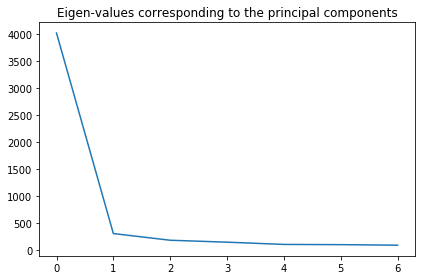

In [21]:
fig, ax = plt.subplots()

ax.plot(principal_eig_val)
ax.set_title("Eigen-values corresponding to the principal components")

plt.tight_layout()